# Distracted Driving

Researchers at the University of Utah (Strayer and Johnston, 2001) asked student volunteers to use a machine that simulated driving situations. At irregular intervals, a target would flash red or green. Participants were instructed to press a "brake button" as soon as possible when they detected a red light. The machine would calculate the mean reaction time to the red flashing targets for each student in milliseconds.

The students were given a warm-up period to familiarize themselves with the driving simulator. Then the researchers had each student use the driving simulation machine while talking on a cell phone about politics to someone in another room and then again with music or a book-on-tape
playing in the background (control). The students were randomly assigned as to whether they used the cell phone or the control setting for the first trial. 

In [1]:
from symbulate import *
%matplotlib inline

In [2]:
# This cell should only be modified only by a grader.
scores = []

The data for 16 students appears below. The first number in each tuple is their reaction time (in milliseconds) when they used the cell phone, while the second number is their reaction time when they were assigned to control.

In [3]:
data = [
    (636, 604),
    (623, 556),
    (615, 540),
    (672, 522),
    (601, 459),
    (600, 544),
    (542, 513),
    (554, 470),
    (543, 556),
    (520, 531),
    (609, 599),
    (559, 537),
    (595, 619),
    (565, 536),
    (573, 554),
    (554, 467)
       ]

## Question 1

We want to test the null hypothesis that talking on a cell phone has no effect on reaction time. Suppose we ignore the actual reaction times and just focus on whether or not the reaction time was longer when the subject used a cell phone. We count up the number of subjects who had a longer reaction time when they used a cell phone, and we want to know whether it is more than we would expect by chance, if using a cell phone really has no effect.

**Step 1.** Set up a box model that will allow you to conduct this analysis.

In [4]:
box = [0, 1]
model = RV(BoxModel(box, size=16, replace=True), sum)

In [5]:
## Change original sample list into 1 for when reaction time is greater when on phone, 0 for when it's not
dataMan = [1 if time[0] > time[1] else 0 for time in data]
dataMan

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1]

In [6]:
## Find count of observations where reaction time is greater when on the phone
count = sum(dataMan)
count

13

**Step 2.** Simulate from the box model, and compare the observed value to the simulations to obtain a $p$-value.

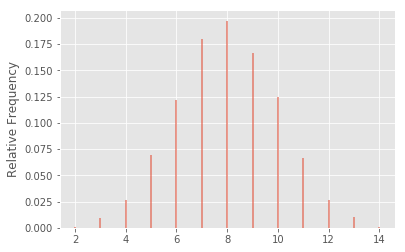

In [7]:
sims = model.sim(5000)
sims.plot()

In [8]:
## Find p-value using observed count
sims.count_geq(13)/5000

0.0116

**Step 3.** Interpret the $p$-value in context, and state your conclusion precisely.

Assuming there is no difference in reaction time when someone is on their phone, there is a 0.1% chance we would observe 13 counts or more of a higher reaction time when someone is on their phone out of a sample of 16 observations. Given this, we conclude that using a cell phone while driving does, in fact, have an effect on one's reaction time.

### Grader's Comments

- 
- 

[This question is worth 20 points.]

In [9]:
# This cell should only be modified only by a grader.
scores.append(0)

## Question 2

Now let's use the reaction times to test the same null hypothesis. First, we'll calculate the difference between the reaction times for each subject (the reaction time when he/she talked on a cell phone, minus the reaction time when he/she was assigned to control). 

If talking on a cell phone really has no effect on reaction time, what would you expect the average difference to be? Can the observed difference be explained by random chance?

Conduct a complete hypothesis test by simulating from a relevant model, comparing the observed data to the simulations, and calculating a $p$-value. Be sure to interpret the $p$-value in context and state your final conclusion precisely. (Two cells have been provided for you below, but you may need to insert more.)

In [10]:
## Create new list with time differences for each observation (phone-noPhone)
timediff = [i[0] - i[1] for i in data]
timediff

[32, 67, 75, 150, 142, 56, 29, 84, -13, -11, 10, 22, -24, 29, 19, 87]

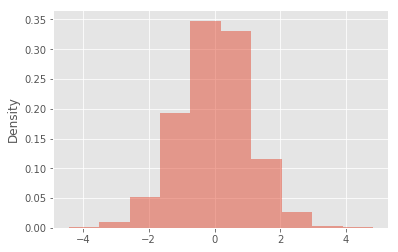

In [11]:
## Create sample t-distribution using new list of differences
n = len(timediff)
T = RV(StudentT(df=n-1))
sims = T.sim(5000)
sims.plot(type="bar")

In [12]:
## Find t-value of observed data
tSamp = (mean(timediff)-0)/(sd(timediff)/sqrt(n))
tSamp

3.792645702135892

In [13]:
## Calculate p-value using observed t-value
sims.count_geq(tSamp)/5000

0.001

Assuming there really is no difference in reaction time when talking on the phone, there is a 0.1% chance we would observe a t-value of 3.79 or greater from our observed data. We would have to accept that an approximately 1 in 100 event has just happened if we believe the null to be true. Based on this, we would conclude that there truly is a difference in average reaction time when someone is talking on their cell phone.

### Grader's Comments

- 
- 

[This question is worth 20 points.]

In [14]:
# This cell should only be modified only by a grader.
scores.append(0)